# **ATIVIDADE FINAL**

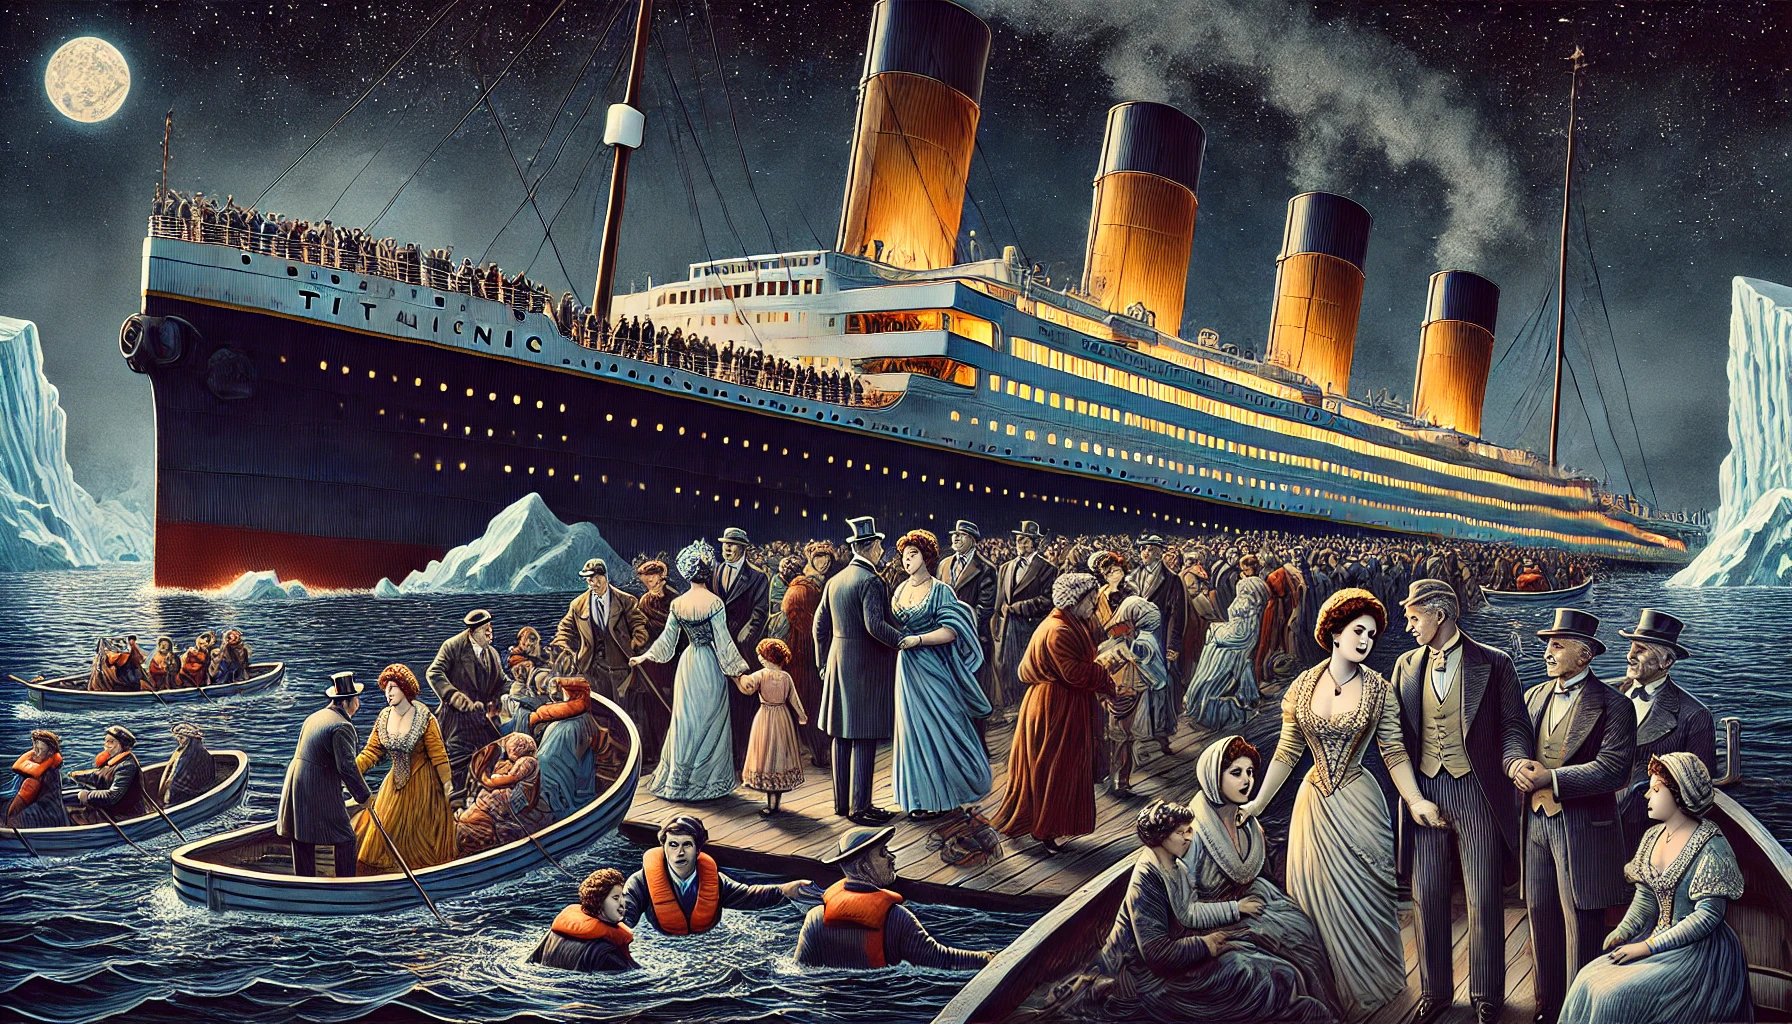

Referência externa:

Informação sobre sobreviventes:
https://noticias.uol.com.br/saude/ultimas-noticias/afp/2012/07/31/homens-sobrevivem-mais-que-mulheres-e-criancas-em-naufragios-titanic-e-excecao.htm

Dataset usado. É o train.csv, mas foi mudado o nome para titanic para fins de melhor entendimento:
https://www.kaggle.com/c/titanic/data?select=train.csv

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
titanic = pd.read_csv('/content/sample_data/Titanic.csv', encoding='latin1')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###**TEMA:**

###**Classe social e riqueza: até que ponto o privilégio compra segurança em situações de crise?**

*Pergunta: Até que ponto a classe social e o valor pago pela passagem influenciam as chances de sobrevivência?*

In [ ]:
survival_by_class = titanic.groupby('Pclass')['Survived'].mean()
print(survival_by_class)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


<ipython-input-12-71baff3cc9fc>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette='Blues_d')


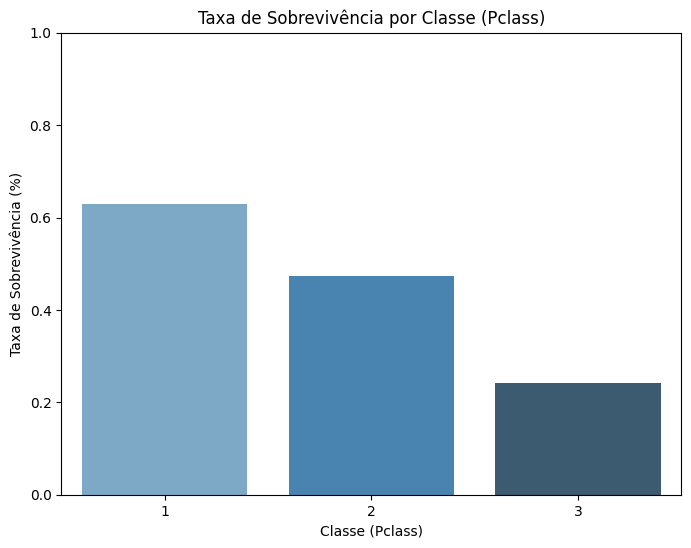

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(x=survival_by_class.index, y=survival_by_class.values, palette='Blues_d')
plt.title("Taxa de Sobrevivência por Classe (Pclass)")
plt.xlabel("Classe (Pclass)")
plt.ylabel("Taxa de Sobrevivência (%)")
plt.ylim(0, 1)
plt.show()

Com base nos dados e no gráfico, é revelado que passageiros de classes mais altas(1ª classe) tiveram a sua taxa de sobrevivência significativamente maior em comparação com aqueles das classes 2 e 3.

*Pergunta: Qual é a taxa de sobrevivência de homens e mulheres mas de classes diferentes?*

<ipython-input-18-925986e19d07>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=survival_by_gender_class.index, y=survival_by_gender_class.values, palette='coolwarm')


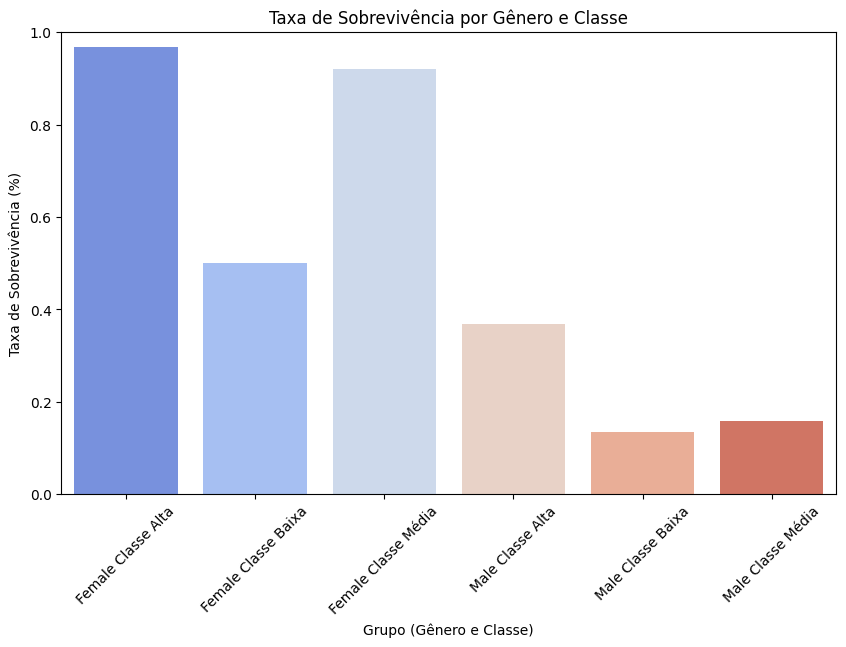

In [ ]:
titanic['Class_Group'] = titanic['Pclass'].apply(lambda x: 'Alta' if x == 1 else ('Média' if x == 2 else 'Baixa'))

titanic['Gender_Class_Group'] = titanic.apply(lambda row: f'{row["Sex"].capitalize()} Classe {row["Class_Group"]}', axis=1)

survival_by_gender_class = titanic.groupby('Gender_Class_Group')['Survived'].mean()

plt.figure(figsize=(10,6))
sns.barplot(x=survival_by_gender_class.index, y=survival_by_gender_class.values, palette='coolwarm')
plt.title("Taxa de Sobrevivência por Gênero e Classe")
plt.xlabel("Grupo (Gênero e Classe)")
plt.ylabel("Taxa de Sobrevivência (%)")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

Como mostrado no gráfico, as mulheres foram as que mais tiveram prioridade para serem salvas, mesmo as de classes mais baixas. Um ponto positivo para o sistema de controle de crise do cruzeiro planejava que era: Em caso de emergencia, priorizar mulheres e crianças.

*A tarifa paga pelo passageiro está assosciada à chance de sobrevivência? Qual a relação entre as colunas?*

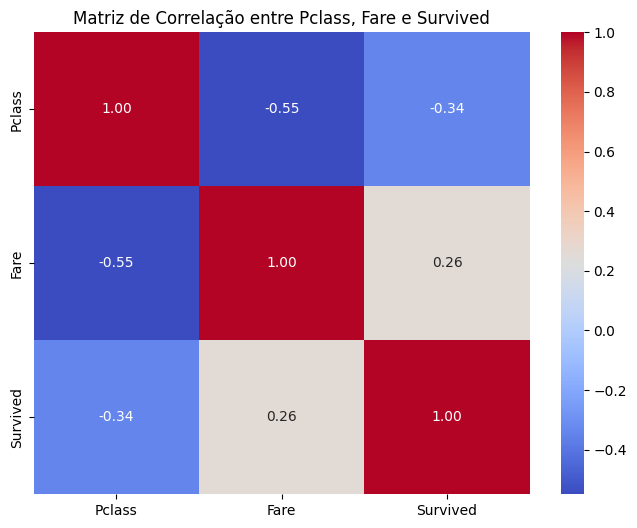

In [ ]:
correlation_matrix = titanic[['Pclass', 'Fare', 'Survived']].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlação entre Pclass, Fare e Survived")
plt.show()

Esse mapa de calor de correlação mostra relações positivas entre preço da passagem(fare) e sobreviventes(survived), sugerindo que passageiros que pagam tarifas mais altas têm maior chance de sobrevivência.

Da mesma forma, classes(Pclass) mais baixas tendem a ter menor chance de sobrevivência (survived). Onde grande parte deste número é provavel que seja de homens, visto que o titanic foi um dos poucos naufrágios em que o número de mulheres sobreviventes ultrapassou o número de homens.

### **CONCLUSÃO**

A análise dos dados do Titanic revela uma correlação forte entre classe social, riqueza e chance de sobrevivência em uma situação de crise. Passageiros de classes superiores, que pagaram tarifas mais altas, tiveram significativamente mais chances de sobreviver. Este padrão é especialmente evidente entre mulheres e crianças da primeira classe, que exibiram as maiores taxas de sobrevivência. Esse cenário reflete as normas sociais de 1912, onde o protocolo "mulheres e crianças primeiro" foi rigorosamente seguido, especialmente entre os passageiros de classe mais alta.

Curiosamente, o Titanic se destaca na história dos naufrágios por ser uma exceção ao padrão geral, onde geralmente homens têm maiores chances de sobrevivência que mulheres e crianças. A tragédia do Titanic contrasta com outros naufrágios, onde o instinto de autopreservação muitas vezes favoreceu os homens. No Titanic, no entanto, a adesão às normas sociais e o privilégio associado à classe social proporcionaram uma oportunidade maior de sobrevivência para mulheres e crianças, especialmente nas classes mais altas.

Essa análise não apenas reforça o impacto de fatores socioeconômicos em situações de emergência, mas também destaca como normas sociais específicas podem redefinir padrões de sobrevivência. O Titanic, assim, permanece não apenas como um ícone de tragédia, mas também como um estudo social sobre a influência de classe, gênero e riqueza na busca pela segurança.